In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/MODELOS MONOGRAFIA/otrasinfeccionesMonografia.csv", sep=";")

# Mostrar las primeras filas del dataset para analizar su estructura
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fecha,semana,tipo,varones,mujeres,total
0,7/1/2019,1,EDA,486,527,1013
1,7/1/2019,1,IRAsinNeumo,1176,1292,2468
2,7/1/2019,1,neumonia,30,36,66
3,14/1/2019,2,EDA,585,627,1212
4,14/1/2019,2,IRAsinNeumo,1789,1963,3752


In [ ]:
# Filtrar los datos para Neumonía en mujeres y preparar el formato
data_neumonia_varones = data[data['tipo'] == 'neumonia'][['fecha', 'varones']]
data_neumonia_varones['fecha'] = pd.to_datetime(data_neumonia_varones['fecha'], dayfirst=True)
data_neumonia_varones = data_neumonia_varones.sort_values(by='fecha')
data_neumonia_varones.set_index('fecha', inplace=True)

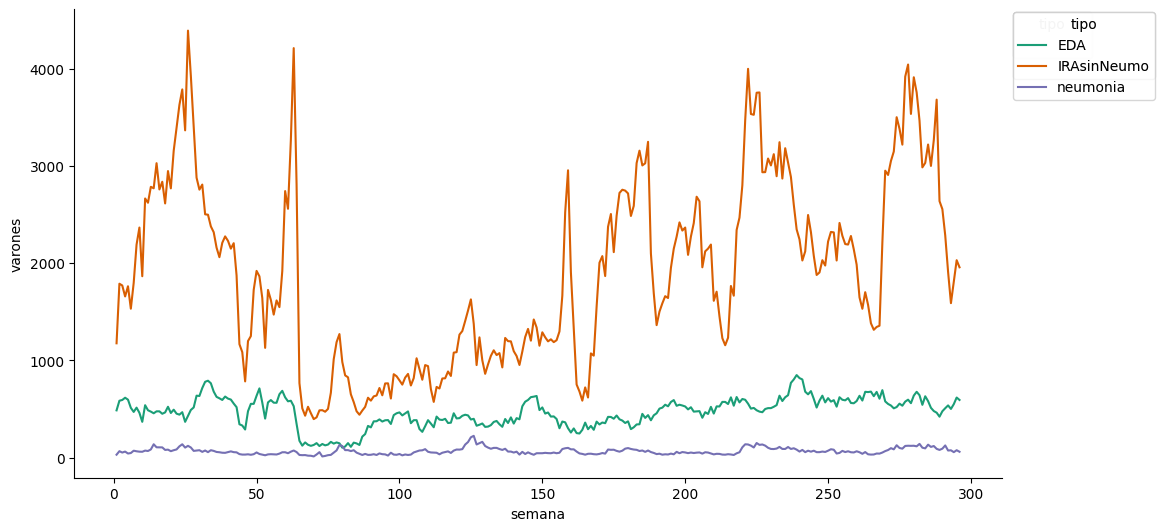

In [ ]:
# @title semana vs varones

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['semana']
  ys = series['varones']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('semana', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tipo')):
  _plot_series(series, series_name, i)
  fig.legend(title='tipo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('semana')
_ = plt.ylabel('varones')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_neumonia_varones)

# Crear secuencias de datos para el modelo LSTM
def create_sequences(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Dividir los datos en entrenamiento (85%) y prueba (15%)
train_size = int(len(data_scaled) * 0.85)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Crear secuencias para entrenamiento y prueba
time_steps = 4
x_train, y_train = create_sequences(train, time_steps)
x_test, y_test = create_sequences(test, time_steps)

# Cambiar la forma de los datos para que sean compatibles con LSTM (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0500
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114
Epoch 16/50
16/16 ━━━━━━━━━━━━

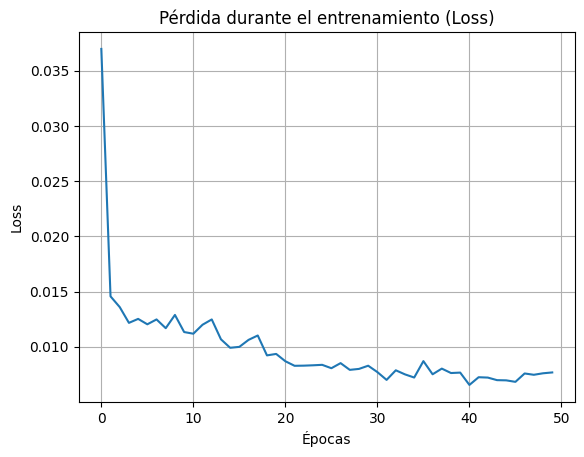

In [ ]:
# Construir el modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, 1)))
model_lstm.add(Dropout(0.2))  # Capa de Dropout
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))  # Capa de Dropout
model_lstm.add(Dense(1))

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=16, verbose=1)

# Graficar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
MAE: 14.84
RMSE: 18.51
MAPE: 19.25%
sMAPE: 18.74%


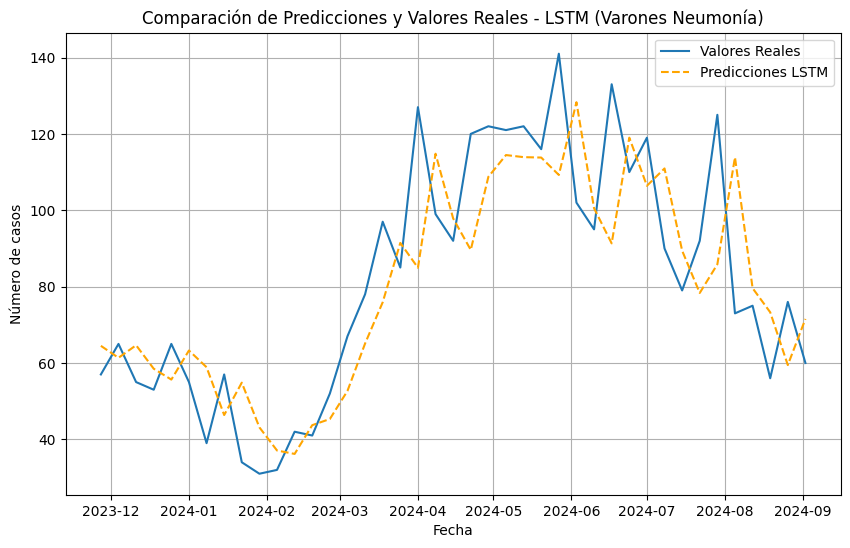

In [ ]:
# Realizar predicciones en el conjunto de prueba
test_predict = model_lstm.predict(x_test)

# Desescalar las predicciones y los valores reales
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calcular métricas de evaluación: MAE, RMSE, MAPE y sMAPE
mae_lstm = mean_absolute_error(y_test[0], test_predict[:, 0])
rmse_lstm = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
mape_lstm = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100  # Convertir a porcentaje
smape_lstm = 100 * np.mean(2 * np.abs(y_test[0] - test_predict[:, 0]) / (np.abs(y_test[0]) + np.abs(test_predict[:, 0])))

# Imprimir métricas
print(f'MAE: {mae_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'sMAPE: {smape_lstm:.2f}%')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(data_neumonia_varones.index[train_size + time_steps:], y_test[0], label='Valores Reales')
plt.plot(data_neumonia_varones.index[train_size + time_steps:], test_predict[:, 0], color='orange', linestyle='--', label='Predicciones LSTM')
plt.title("Comparación de Predicciones y Valores Reales - LSTM (Varones Neumonía)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

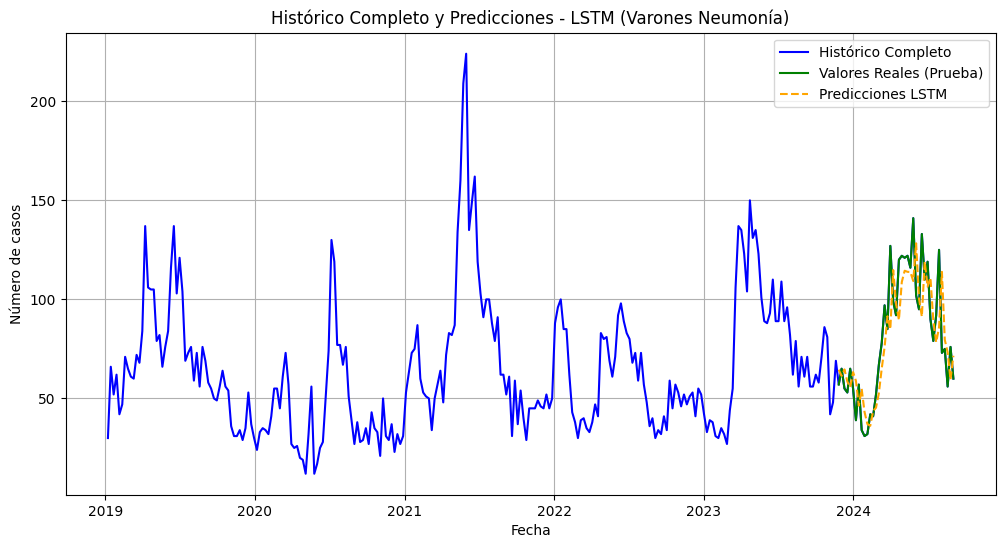

In [ ]:
# Graficar el histórico completo junto con las predicciones del modelo LSTM
plt.figure(figsize=(12, 6))
plt.plot(data_neumonia_varones.index, scaler.inverse_transform(data_scaled), label="Histórico Completo", color="blue")
plt.plot(data_neumonia_varones.index[train_size + time_steps:], y_test[0], label="Valores Reales (Prueba)", color="green")
plt.plot(data_neumonia_varones.index[train_size + time_steps:], test_predict[:, 0], color='orange', linestyle='--', label="Predicciones LSTM")
plt.title("Histórico Completo y Predicciones - LSTM (Varones Neumonía)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Crear DataFrame comparativo de los valores reales y predichos
comparison_df_lstm_neumonia_varones = pd.DataFrame({
    'Fecha': data_neumonia_varones.index[train_size + time_steps:],
    'Valores Reales': y_test[0],
    'Predicciones LSTM': test_predict[:, 0]
})

# Mostrar el DataFrame comparativo
print(comparison_df_lstm_neumonia_varones)

        Fecha  Valores Reales  Predicciones LSTM
0  2023-11-27            57.0          64.493744
1  2023-12-04            65.0          61.360954
2  2023-12-11            55.0          64.649826
3  2023-12-18            53.0          58.500916
4  2023-12-25            65.0          55.655628
5  2024-01-01            55.0          63.276623
6  2024-01-08            39.0          58.894489
7  2024-01-15            57.0          46.368996
8  2024-01-22            34.0          54.848675
9  2024-01-29            31.0          43.146465
10 2024-02-05            32.0          37.081539
11 2024-02-12            42.0          36.185341
12 2024-02-19            41.0          43.717552
13 2024-02-26            52.0          45.327316
14 2024-03-04            67.0          52.696285
15 2024-03-11            78.0          65.103500
16 2024-03-18            97.0          75.908264
17 2024-03-25            85.0          91.456757
18 2024-04-01           127.0          84.950943
19 2024-04-08       

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicciones futuras:
[[63.71275 ]
 [64.092575]
 [64.3638  ]
 [65.130226]
 [65.60574 ]
 [66.06818 ]
 [66.47407 ]
 [66.82138 ]]
       Fecha  Predicciones
0 2024-09-15     63.712749
1 2024-09-22     64.092575
2 2024-09-29     64.363800
3 2024-10-06     65.130226
4 2024-10-13     65.605743
5 2024-10-20     66.068176
6 2024-10-27     66.474068
7 2024-11-03     66.821381


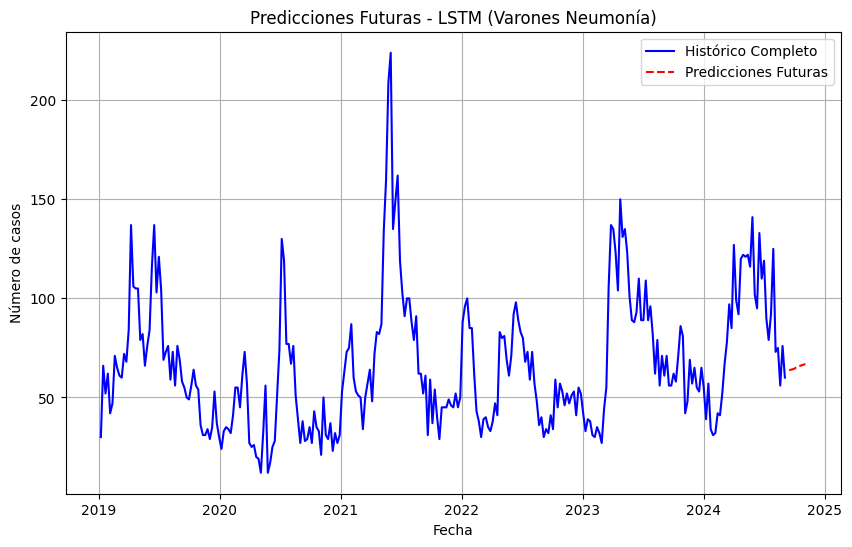

In [ ]:
# prompt: realiza 8 predicciones futuras

# Preparar los datos para la predicción futura
last_sequence = data_scaled[-time_steps:]
last_sequence = np.reshape(last_sequence, (1, time_steps, 1))

# Realizar 8 predicciones futuras
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(8):
    prediction = model_lstm.predict(current_sequence)
    future_predictions.append(prediction[0, 0])

    # Actualizar la secuencia para la siguiente predicción
    current_sequence = np.concatenate((current_sequence[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

# Desescalar las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Imprimir las predicciones
print("Predicciones futuras:")
print(future_predictions)

# Crear un índice de fechas para las predicciones futuras
last_date = data_neumonia_varones.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(weeks=1), periods=8, freq='W')

# Crear un DataFrame para las predicciones futuras
future_predictions_df = pd.DataFrame({'Fecha': future_dates, 'Predicciones': future_predictions.flatten()})
print(future_predictions_df)

# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data_neumonia_varones.index, scaler.inverse_transform(data_scaled), label="Histórico Completo", color="blue")
plt.plot(future_dates, future_predictions, label="Predicciones Futuras", color="red", linestyle='--')
plt.title("Predicciones Futuras - LSTM (Varones Neumonía)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

MAE: 10.98
RMSE: 11.81
MAPE: 20.44%
sMAPE: 18.34%
   Actual Values  Predicted Values
0             72         63.712749
1             58         64.092575
2             56         64.363800
3             56         65.130226
4             50         65.605743
5             59         66.068176
6             52         66.474068
7             48         66.821381


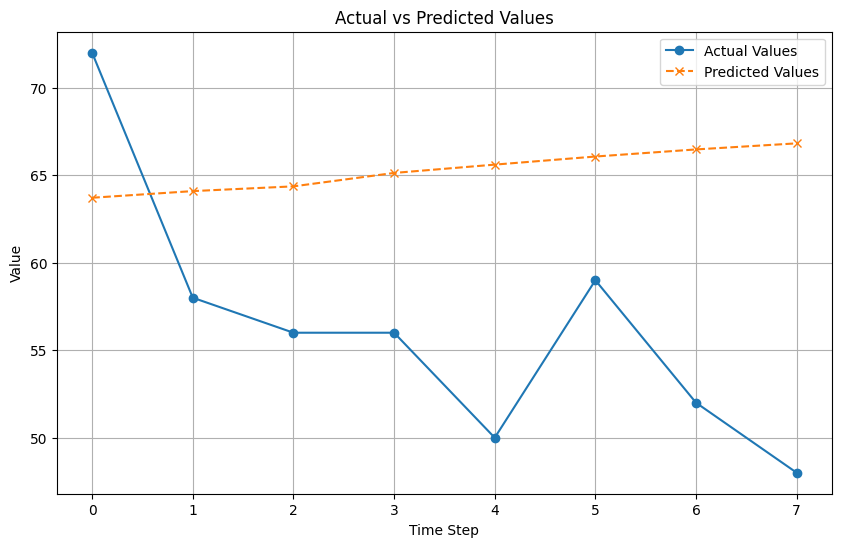

In [ ]:
# prompt: estos son los 8 valores reales, realiza la comparacion y evalualo:
# 72
# 58
# 56
# 56
# 50
# 59
# 52
# 48

# Provided values for comparison
actual_values = [72, 58, 56, 56, 50, 59, 52, 48]

# Assuming 'future_predictions' from the previous code contains the model's predictions
# Replace this with the actual variable name if it's different

# Calculate evaluation metrics for the provided actual values and model predictions
mae = mean_absolute_error(actual_values, future_predictions.flatten())
rmse = np.sqrt(mean_squared_error(actual_values, future_predictions.flatten()))
mape = mean_absolute_percentage_error(actual_values, future_predictions.flatten()) * 100
smape = 100 * np.mean(2 * np.abs(np.array(actual_values) - future_predictions.flatten()) / (np.abs(np.array(actual_values)) + np.abs(future_predictions.flatten())))

# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': future_predictions.flatten()
})

# Display the comparison DataFrame
print(comparison_df)


# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(future_predictions.flatten(), label="Predicted Values", marker='x', linestyle='--')
plt.title("Actual vs Predicted Values")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()